In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
import spacy

Test data provided does not have labels. Use the training data as the original df and perform train_test_split instead

In [2]:
kaggle_train = pd.read_csv('data/train_kaggle.csv')
glue_train = pd.read_csv('data/train_glue.tsv', sep = '\t')
glue_dev = pd.read_csv('data/dev_glue.tsv', sep = '\t')
glue_train = pd.concat([glue_train, glue_dev])

Data cleaning

In [3]:
df = pd.concat([kaggle_train, glue_train])
print('train set dimensions: ', df.shape)
print('\n')


# Remove duplicated data since there might be overlap from 2 different sources
df = df.drop_duplicates(subset = ['question1', 'question2'])
print('train set dimensions after dropping duplicates by question pair: ', df.shape)
print('\n')


# Check for duplicated ID since we are using 2 different sources
df = df.drop_duplicates(subset = ['qid1', 'qid2'])
print('train set dimensions after dropping duplicates by qid pair: ', df.shape)

df = df.drop('id', axis = 1)
X, y = df.drop('is_duplicate', axis = 1), df['is_duplicate']

train set dimensions:  (808566, 6)


train set dimensions after dropping duplicates by question pair:  (404290, 6)


train set dimensions after dropping duplicates by qid pair:  (404290, 6)


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size = 0.25, random_state = 42, stratify = y, shuffle = True
)

Distribution of + and - is still acceptable of about 2:3 for +:-

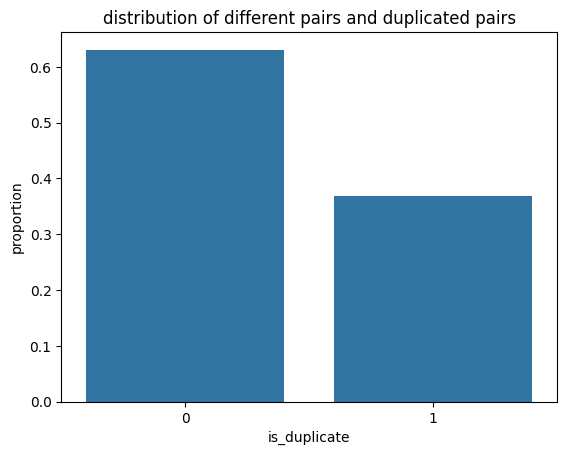

In [24]:
sns.barplot(y_train.value_counts(normalize = True))
plt.title('distribution of different pairs and duplicated pairs')
plt.show()

In [ ]:
nlp = spacy.load('en_core_web_sm')
# represents ID tagged to question
id_qn_pair = np.concatenate((X_train[['qid1', 'question1']].values, X_train[['qid2', 'question2']].values))
id_qn_pair = [(qid, nlp(q)) for qid, q in id_qn_pair]

# stores an array of triples qid1, qid2 and label
q1q2_id_label_triple = np.concatenate(
    (X_train[['qid1', 'qid2']].values, 
     y_train.values.reshape(-1, 1)), axis = 1)

In [ ]:
id_qn_lemma_pair = [(qid, [token.lemma_ for token in q if not token.is_stop]) for qid, q in id_qn_pair]